# Decision Trees

In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Classification

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

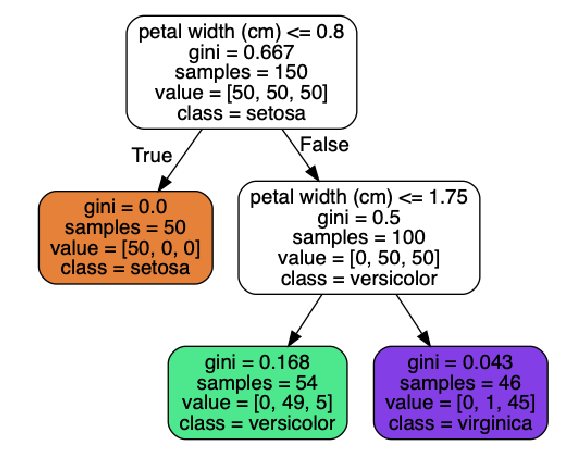

In [4]:
def image_path(fig_name):
    curr_dir = os.getcwd()
    return os.path.join(curr_dir,"images",fig_name)

def make_png_from_dot(fig_name):
    curr_dir = os.getcwd()
    dot_path = os.path.join(curr_dir,"images",fig_name)
    img_path = dot_path.replace(".dot",".png")
    cmd = "dot -Tpng " + dot_path + " -o " + img_path
    os.system(cmd)
    return None

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=image_path("iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
make_png_from_dot("iris_tree.dot")


import matplotlib.image as mpimg
plt.figure(figsize=(10,8))
plt.axis("off")
img = mpimg.imread(image_path("iris_tree.png"))
plt.imshow(img)
plt.show()

Decision Trees in Scikit-Learn train using the Classification And Regression Tree (CART) algorithm.  The algorithm forst splits the training set into two subets using a single feature $k$ and a threshold $t_k$ such that the pair $(k,t_k)$ produces the pureset subets (weighted by their size).  The cost function this algorithm minimizes is given by 
\begin{equation}
J(k,t_k) = \frac{m_{\text{left}}}{m}G_{\text{left}} + \frac{m_{\text{right}}}{m}G_{\text{right}}
\end{equation}
where $m_{\text{left/right}}$ is the number of instances in the left/right subset and 
\begin{equation}
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^{2}
\end{equation}
is the Gini impurity with $p_{i,k}$ as the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

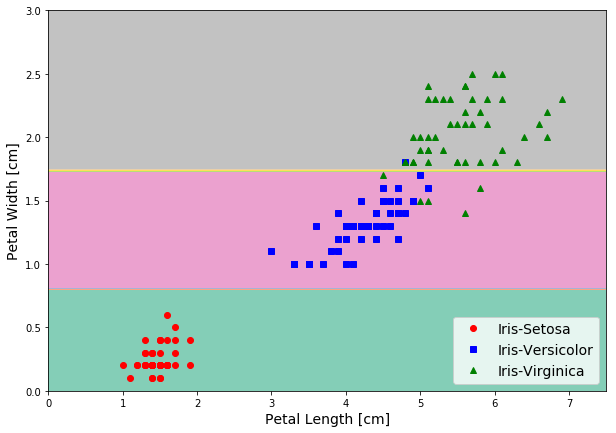

In [5]:
def plot_decision_boundary(clf, X, y, axes=[0,7.5,0,3], iris=True, legend=False, plot_training=True, alpha=0.8):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, cmap="Set2", alpha=alpha)
    if not iris:
        plt.contour(x1, x2, y_pred, alpha=0.8)
    if plot_training:
        plt.plot(X[:,0][y==0], X[:, 1][y==0], "ro", label="Iris-Setosa")
        plt.plot(X[:,0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:,0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal Length [cm]", fontsize=14)
        plt.ylabel("Petal Width [cm]", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
plt.figure(figsize=(10,7))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.show()
    
        

Decision Trees can be very sensitive to training data. For example, removing the widest Iris-Versicolor flower from the above data produces a drastically different solution:

In [6]:
X[(X[:,1]==X[:,1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [7]:
not_widest_versicolor = (X[:,1]!=1.8) | (y==2)
X_remove_wide_versicolor = X[not_widest_versicolor]
y_remove_wide_versicolor = y[not_widest_versicolor]

tree_clf_no_wide_versicolor = DecisionTreeClassifier(max_depth=2)
tree_clf_no_wide_versicolor.fit(X_remove_wide_versicolor, y_remove_wide_versicolor)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

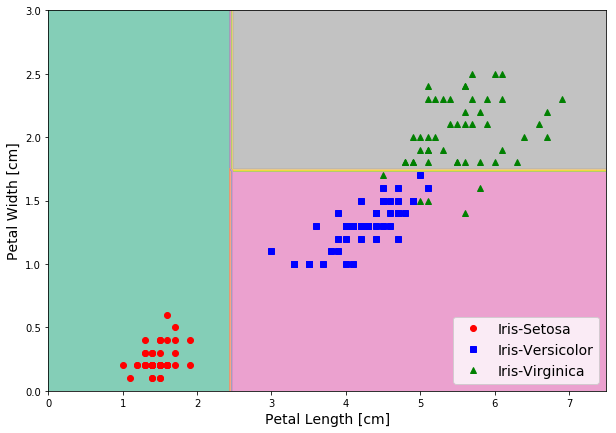

In [8]:
plt.figure(figsize=(10,7))
plot_decision_boundary(tree_clf_no_wide_versicolor, X_remove_wide_versicolor, y_remove_wide_versicolor, legend=True)
plt.show()

### Hyperparameters to tune:
Decision trees can drastically overfit the data without regularization.  The following regularization hyperparameters are available in Scikit-Learn:

1. max_depth = restricts the maximum depth of the tree
2. min_samples_split = the minimum number of samples a node must have before splitting
3. min_samples_leaf = the minimum number of samples a leaf node must have
4. min_weight_fraction_leaf = the same as min_samples_leaf, but as a fraction of the total number of weighted instances
5. max_leaf_nodes = maximum number of leaf nodes
6. max_features = maximum number of features that are evaluated for splitting at each node

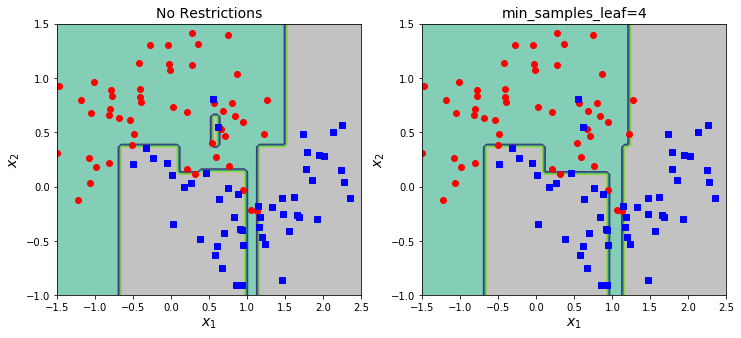

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25)

deep_tree_clf1 = DecisionTreeClassifier()
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4)
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

plt.figure(figsize=(12,5))
axes=[-1.5,2.5,-1,1.5]
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=axes, iris=False)
plt.title("No Restrictions", fontsize=14)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=axes, iris=False)
plt.title("min_samples_leaf={}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.show()


## Regression

In [10]:
# Quadratic trianing set + noise
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5)**2 + np.random.rand(m,1) / 10

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

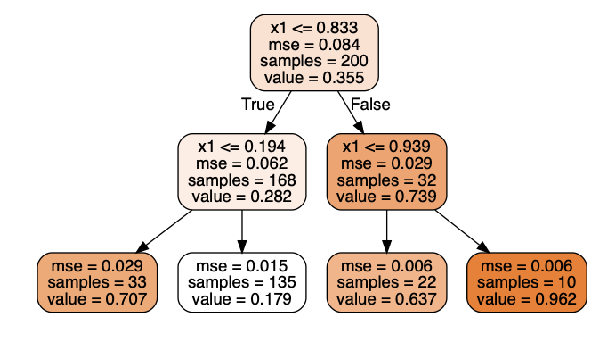

In [12]:
export_graphviz(
    tree_reg,
    out_file=image_path("quad_tree_reg.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
make_png_from_dot("quad_tree_reg.dot")
plt.figure(figsize=(10,8))
plt.axis("off")
img = mpimg.imread(image_path("quad_tree_reg.png"))
plt.imshow(img)
plt.show()

Regression trees train the same way as decision trees, but instead of classification as the final result, the trees use the average of the leaf node values to make the predictions.  Also, the CART cost function for regression becomes
\begin{equation}
J(k,t_k) = \frac{m_{\text{left}}}{m}\text{MSE}_{\text{left}} + \frac{m_{\text{right}}}{m}\text{MSE}_{\text{right}}
\end{equation}
where MSE is the mean squared error of the node.

In [13]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg3 = DecisionTreeRegressor(min_samples_leaf=10)
tree_reg4 = DecisionTreeRegressor()
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)
tree_reg3.fit(X,y)
tree_reg4.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

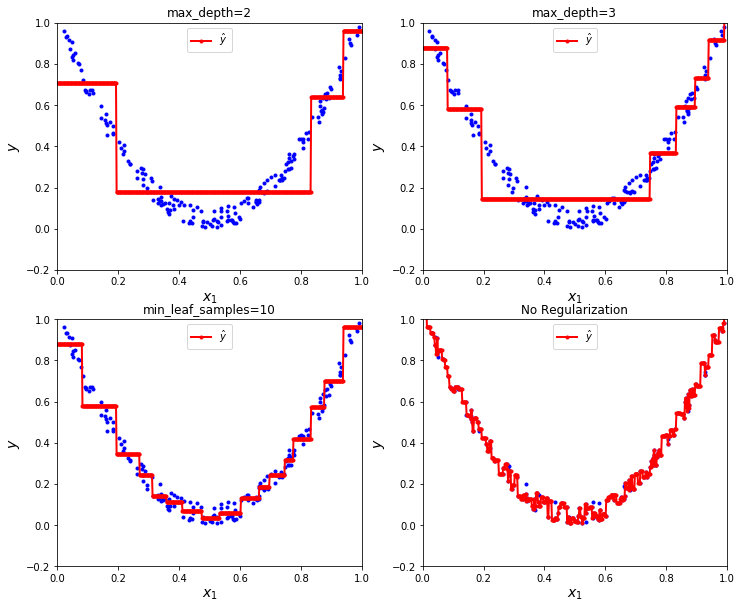

In [14]:
def plot_regression_predictions(tree_reg, X, y, axes=[0,1,-0.2,1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
plt.figure(figsize=(12,10))
plt.subplot(221)
plot_regression_predictions(tree_reg1, X, y)
plt.legend(loc="upper center")
plt.title("max_depth={}".format(tree_reg1.max_depth))

plt.subplot(222)
plot_regression_predictions(tree_reg2, X, y)
plt.legend(loc="upper center")
plt.title("max_depth={}".format(tree_reg2.max_depth))

plt.subplot(223)
plot_regression_predictions(tree_reg3, X, y)
plt.legend(loc="upper center")
plt.title("min_leaf_samples={}".format(tree_reg3.min_samples_leaf))

plt.subplot(224)
plot_regression_predictions(tree_reg4, X, y)
plt.legend(loc="upper center")
plt.title("No Regularization")
plt.show()

## Training and Fine-tuning a Decision Tree on the Moons dataset

In [15]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=10000, noise=0.4)

from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2)

In [16]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes':[2,10,20,40,50,60,70,80,90,100],
         'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=2, verbose=2, cv=3)
grid_search_cv.fit(Xm_train,ym_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    3.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'max_leaf_nodes': [2, 10, 20, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [17]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cv.predict(Xm_train)
y_pred_test = grid_search_cv.predict(Xm_test)
print("Training Accuracy: ", accuracy_score(y_pred_train, ym_train))
print("Test Accuracy: ", accuracy_score(y_pred_test,ym_test))


Training Accuracy:  0.869
Test Accuracy:  0.8455


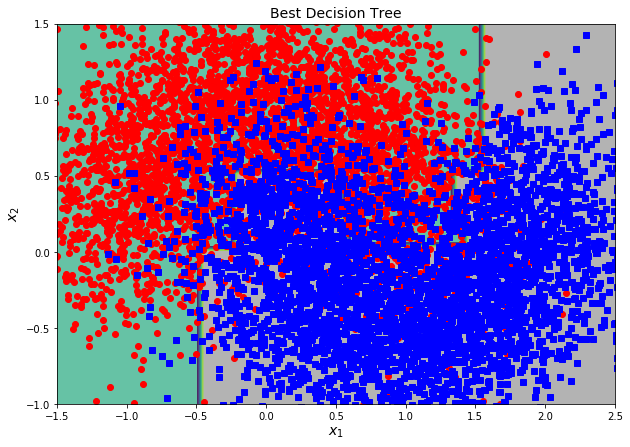

In [19]:
plt.figure(figsize=(10,7))
axes=[-1.5,2.5,-1,1.5]
plot_decision_boundary(grid_search_cv.best_estimator_, Xm_train, ym_train, axes=axes, iris=False, alpha=1)
plt.title("Best Decision Tree", fontsize=14)
plt.show()

## Let's grow a forest!

Making 1000 subsets of the training data above, each containing 100 instances.  Then we will train one Decision Tree on each subset, using the best hyperparameter values from above.

In [20]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []
rs = ShuffleSplit(n_splits=n_trees, test_size=len(Xm_train) - n_instances)
for mini_train_index, mini_test_index in rs.split(Xm_train):
    X_mini_train = Xm_train[mini_train_index]
    y_mini_train = ym_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [21]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []
for tree, (X_mini_train, y_mini_train) in zip (forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(Xm_test)
    accuracy_scores.append(accuracy_score(y_pred,ym_test))

np.mean(accuracy_scores)

0.78347

Only average 80% accuracy among all 1000 decision trees, but what if we use all decision trees to make the prediction?

In [22]:
Y_pred = np.empty([n_trees,len(Xm_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(Xm_test)

In [23]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
print("Forest Accuracy: ", accuracy_score(ym_test, y_pred_majority_votes.reshape([-1])))

Forest Accuracy:  0.8555


Our accuracy is now 1.5% higher when using the Forest vs a single Decision Tree!

## What did we accomplish?

1. Explored Decision Tree classification and regression
2. Visualized Decision Trees to interpret the model
3. Took a look at Decision Tree regularization options and how they affect the tree
4. Made a Forest of Decision trees by hand and used majority vote of the forest to make predictions leading to increased test accuracy over a single decision tree.